In [8]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import seaborn as sns
import os
import datetime

In [9]:
# Find and reference Output File (CSV) from Weather analysis
output_file = "Data/weather_rides_df.csv"

# pull prevously generated and saved output data from csv
weather_rides_df = pd.read_csv(output_file)

weather_rides_df

,date,count_American,count_Carmel,count_Diplo,count_Federal,count_Firstclass,count_Highclass,count_Prestige,count_Skyline,Total,maxtempC,avgtempC,uvIndex,precipMM,cloudcover,humidity,weatherDesc,Weekday
0,2014-07-01,921,2871,1046,11,1744,1368,3345,1668,12974,29.0,26.0,6.0,6.0,30.0,86.0,Moderate or heavy rain shower,Tuesday
1,2014-07-02,1028,2965,1275,4,2228,1661,3533,1691,14385,29.0,27.0,6.0,15.7,28.0,89.0,Moderate or heavy rain shower,Wednesday
2,2014-07-03,1068,3361,1200,12,2121,1599,3649,1157,14167,30.0,27.0,6.0,34.0,38.0,89.0,Torrential rain shower,Thursday
3,2014-07-04,1008,2174,1171,8,1459,1622,3401,337,11180,21.0,20.0,4.0,17.1,43.0,89.0,Moderate or heavy rain shower,Friday
4,2014-07-05,1214,1846,1371,3,1703,1898,4081,276,12392,26.0,23.0,6.0,0.0,4.0,63.0,Sunny,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014-09-26,1101,2816,1055,1,1934,1801,3598,1477,13783,27.0,21.0,6.0,0.0,4.0,74.0,Sunny,Friday
88,2014-09-27,1291,2240,1301,2,1917,2072,4297,561,13681,30.0,24.0,6.0,0.0,0.0,78.0,Sunny,Saturday
89,2014-09-28,1080,2559,1260,1,1831,2032,3985,633,13381,26.0,24.0,6.0,0.0,12.0,75.0,Sunny,Sunday
90,2014-09-29,772,3225,972,0,1868,1558,3215,1846,13456,25.0,22.0,5.0,0.1,51.0,68.0,Overcast,Monday


In [10]:
# Find and reference Output File (CSV) from Weather analysis
output_file2 = "Data/weekday_df.csv"

# pull prevously generated and saved output data from csv
weekday_df = pd.read_csv(output_file2)

weekday_df

,Weekday,count_American,count_Carmel,count_Diplo,count_Federal,count_Firstclass,count_Highclass,count_Prestige,count_Skyline,Total,maxtempC,avgtempC,uvIndex,precipMM,cloudcover,humidity
0,Monday,11055,39139,12507,41,22960,19930,41316,20396,167344,26.615385,23.461538,5.615385,5.700000,20.692308,76.000000
1,Tuesday,12011,39347,13226,36,24718,20261,43591,25924,179114,25.785714,23.000000,5.714286,6.300000,27.357143,78.928571
2,Wednesday,11373,38394,12448,31,23782,18890,40733,25434,171085,27.000000,24.000000,5.769231,5.707692,21.538462,76.461538
3,Thursday,11844,41859,12432,48,23734,19246,41735,24638,175536,25.384615,22.769231,5.461538,4.200000,25.692308,74.461538
4,Friday,14366,38267,14642,47,25381,22740,48317,17867,181627,25.846154,22.153846,5.384615,2.807692,23.307692,75.076923
5,Saturday,16552,28321,17127,43,24227,25897,54289,6404,172860,25.692308,22.923077,5.538462,3.038462,31.230769,76.461538
6,Sunday,14511,31192,16168,30,21967,24961,50660,7033,166522,25.923077,23.153846,5.538462,4.723077,32.076923,78.538462


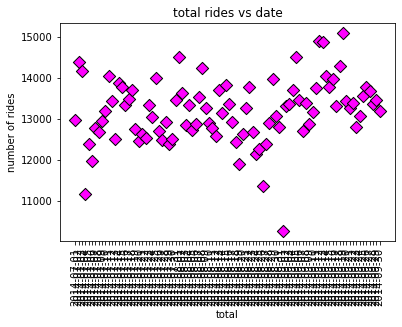

In [11]:
x_values = weather_rides_df['date']
y_values = weather_rides_df['Total']
plt.scatter(x_values,y_values, 
            s=75,
            marker="D",
            color="fuchsia",
            edgecolors="black")
plt.xlabel('date')
plt.ylabel('time')
# plt.ylim(xx, xx)
# plt.xlim(-xx,xx)
# plt.grid(which='major', linestyle='-')
# plt.grid(which='minor', linestyle=':')
plt.title("total rides vs date")
plt.xlabel("total")
plt.ylabel("number of rides")
plt.xticks(x_values, rotation=90)
plt.rcParams["axes.labelsize"] = 2
plt.show()

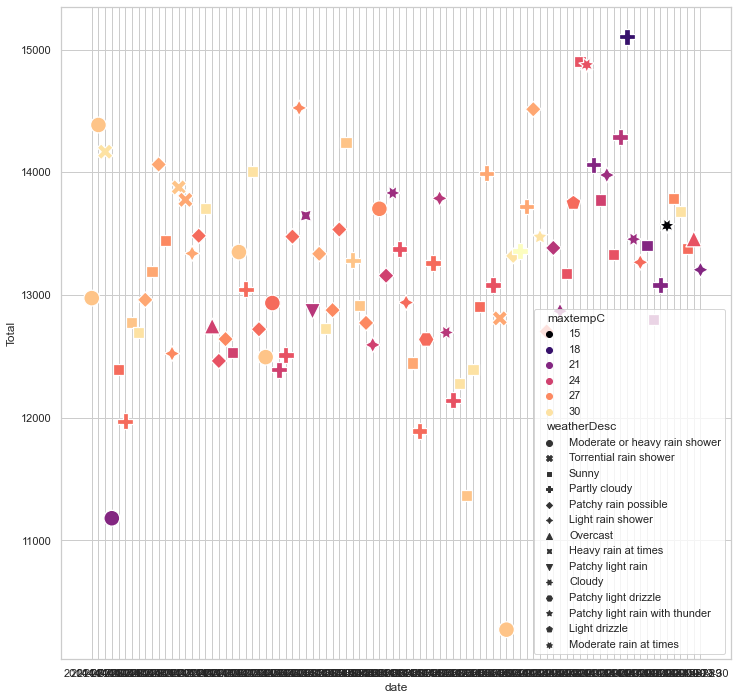

In [51]:
# Seaborn scatter plot
ax=sns.scatterplot(data=weather_rides_df, x="date", y="Total", hue="maxtempC", style="weatherDesc", s=250, palette="magma")
sns.set(rc={"figure.figsize":(22, 11)})
sns.set(style = "whitegrid")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.savefig("Figures/rain_date.png")
# plt.axis('equal') style="weatherDesc",
plt.show()

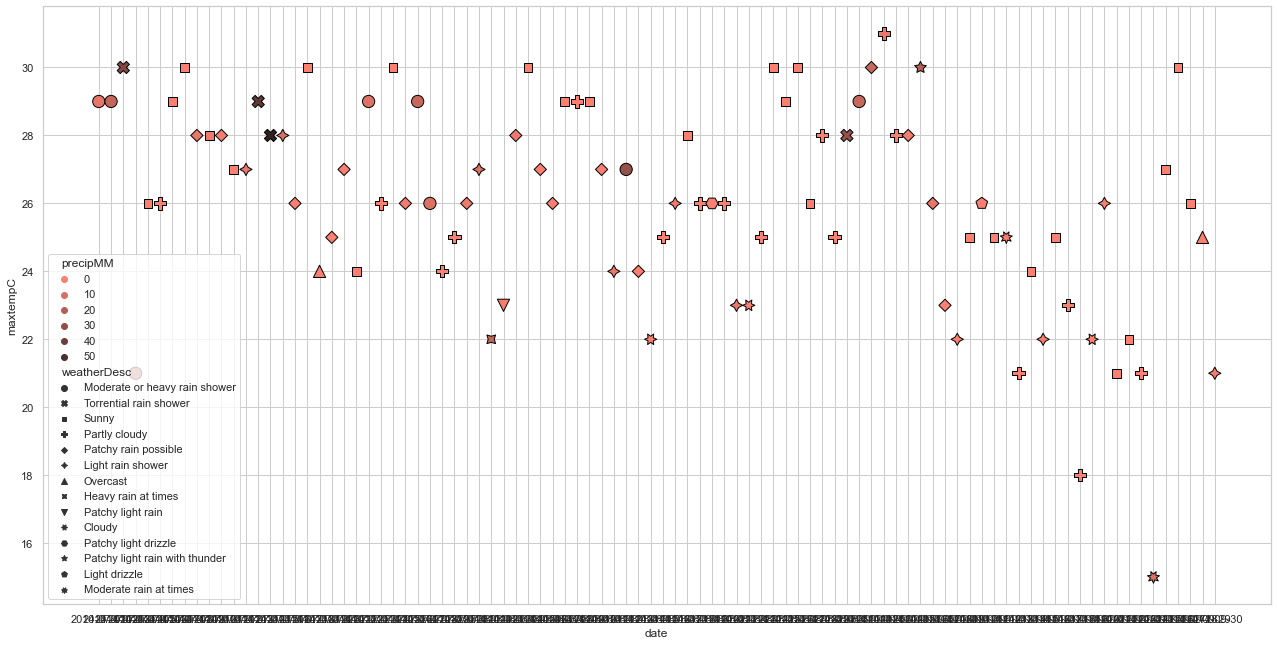

In [54]:
# Seaborn scatter plot
ax=sns.scatterplot(data=weather_rides_df, x="date", y="maxtempC", hue="precipMM", style="weatherDesc", s=150, palette="dark:salmon_r", edgecolor="black")
# sns.set(rc={"figure.figsize":(12, 12)})
sns.set(style = "whitegrid")
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
# sns.color_palette("rocket", as_cmap=True)
plt.savefig('Figures/max Temp_date.png')
# plt.axis('equal')
plt.show()

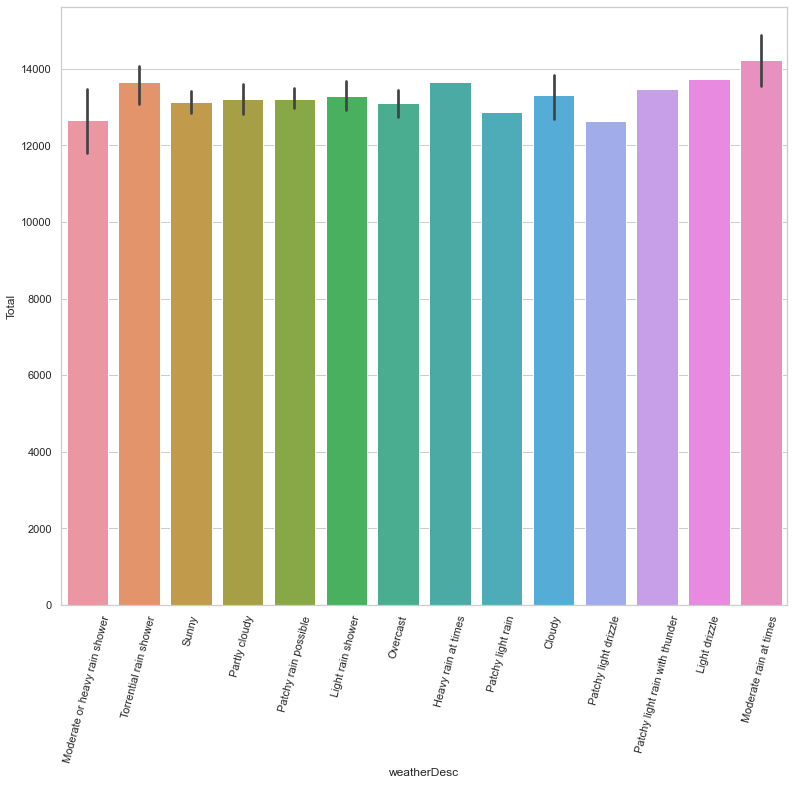

In [31]:
ax = sns.barplot(x = 'weatherDesc', y = 'Total',data = weather_rides_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


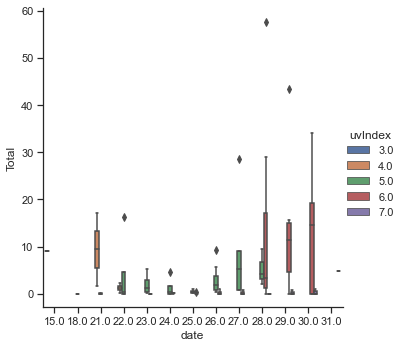

In [41]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("maxtempC", "precipMM", "uvIndex", data=weather_rides_df, kind="box")
    g.set_axis_labels("date", "Total");
    sns.set(rc={"figure.figsize":(20, 17)})
    plt.show()    

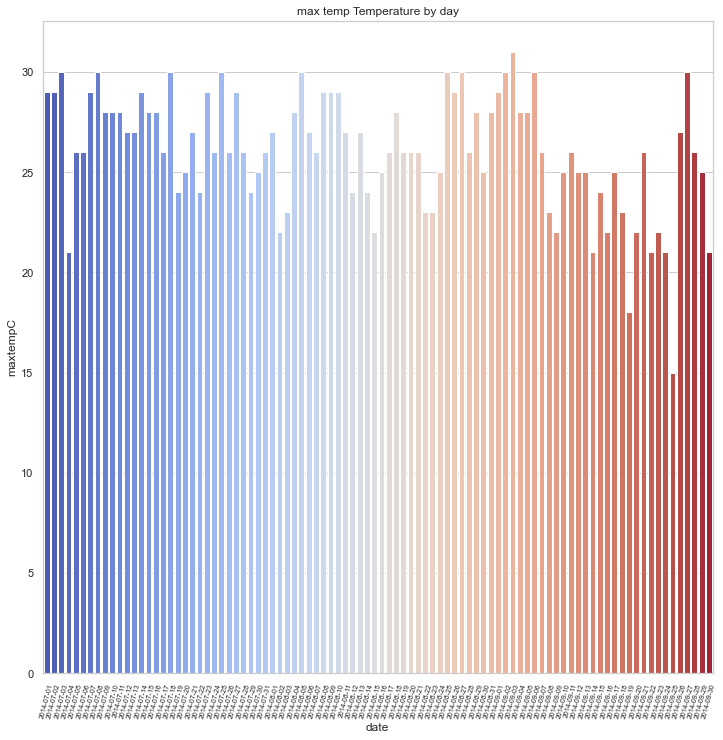

In [45]:
#create bar plot for average temps by month
plt.title('max temp Temperature by day')
ax=sns.barplot(x='date', y='maxtempC', data=weather_rides_df, palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize=7)
plt.show() 

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


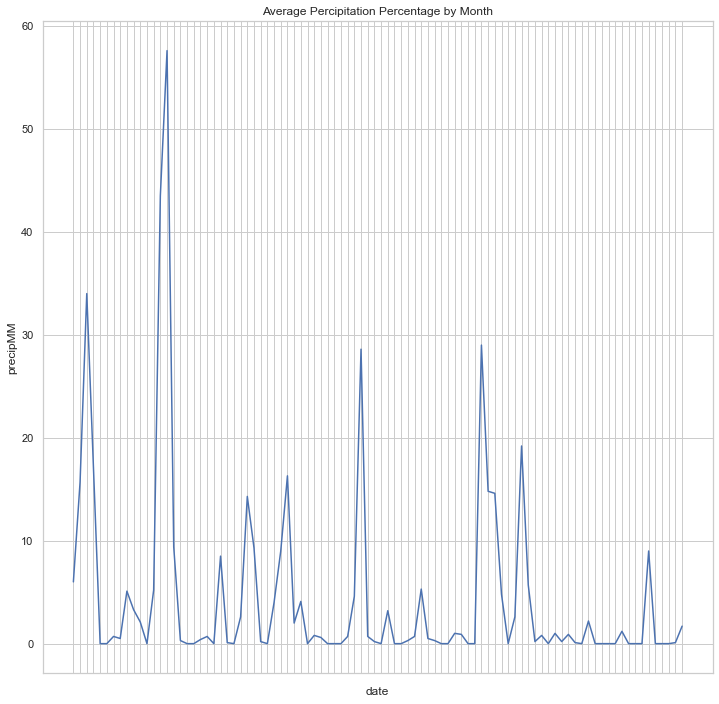

In [42]:
# create line plot for average percipitation levels
plt.title('Average Percipitation Percentage by Month')
ax=sns.lineplot(x='date', y='precipMM', data=weather_rides_df, sort=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize=7)
plt.show()

C:\Users\mosi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


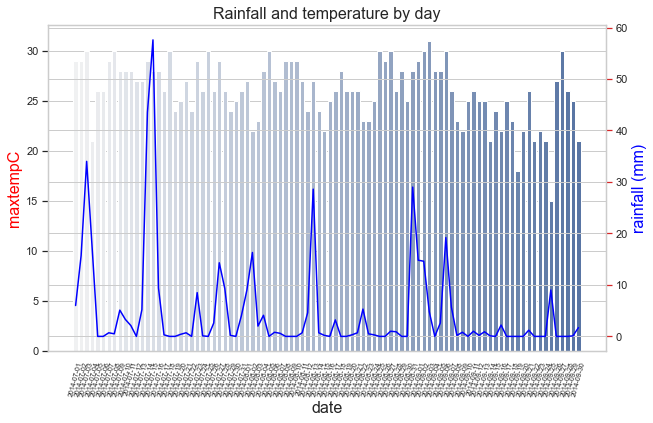

In [38]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Rainfall and temperature by day', fontsize=16)
ax1.set_xlabel('Day', fontsize=16)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize=7)
ax1.set_ylabel('max Temp', fontsize=16, color='red')
ax2 = sns.barplot(x='date', y='maxtempC', data = weather_rides_df, palette='light:b')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('rainfall (mm)', fontsize=16, color='blue')
ax2 = sns.lineplot(x='date', y='precipMM', data = weather_rides_df, sort=False, color='blue')
ax2.tick_params(axis='y', color=color)
plt.show()

In [17]:
# fig = go.Figure()
# fig.add_trace(
#     go.Scatter(
#         x=df['date'],
#         y=df['Total'],
#         name="Total"
#     ))
# fig.add_trace(
#     go.Bar(
#         x=df['date'],
#         y=df['maxtempC'],
#         name="Max temp"
#     ))
# fig.show()

NameError: name 'go' is not defined

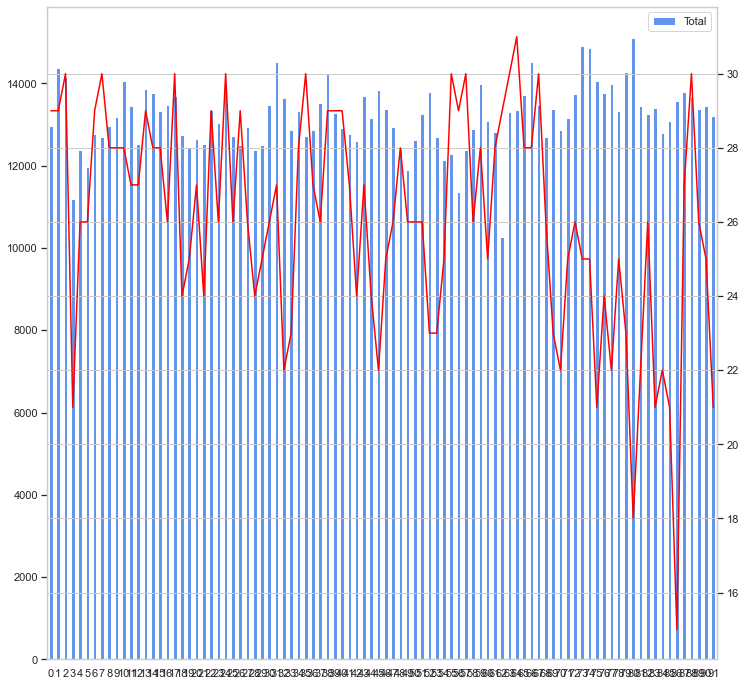

In [47]:
weather_rides_df[['Total']].plot(kind='bar', color=['cornflowerblue'], label= "Total number of rides per day")
weather_rides_df['maxtempC'].plot(color=['red'], secondary_y=True, label = "Max temperature of the day")
# plt.title("total rides vs date")
# plt.xlabel("date")
# plt.ylabel("number of rides")
# plt.xticks(x_values, rotation=90)
# plt.rcParams["axes.labelsize"] = 2
plt.show()